In [80]:
import datetime as dt,numpy as np,pandas as pd
from pandas import DataFrame as DF
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from django_pandas.io import read_frame
from utils import *
import os
from os.path import join
import calendar
pwd=os.getcwd()

from sklearn.model_selection import train_test_split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

In [81]:
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (11, 5)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

In [82]:
pwd=os.getcwd()
path = join(pwd,'z_data\dodgers.csv')
df=pd.read_csv(path)
df['year']=2012
month_dict=dict((v.upper(),k) for k,v in enumerate(calendar.month_abbr))
month_dict.pop('')
df['MON']=df['month']
df['month']=df['month'].map(month_dict)
df['gamedate']=pd.to_datetime(df[['year','month','day']]).dt.date
df['dow']=pd.to_datetime(df['gamedate']).dt.weekday
df['bh_bit']=df['bobblehead'].map(lambda val: 1 if val=="YES" else 0)

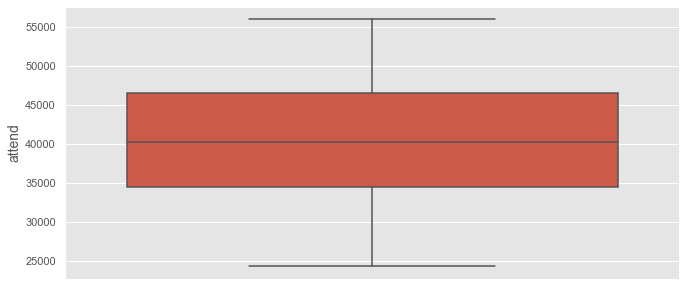

In [83]:
sns.boxplot(y="attend", data=df)

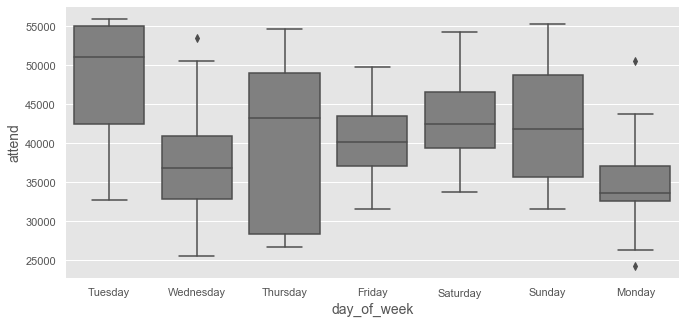

In [84]:
sns.boxplot(x="day_of_week", y="attend", data=df, color = "gray")

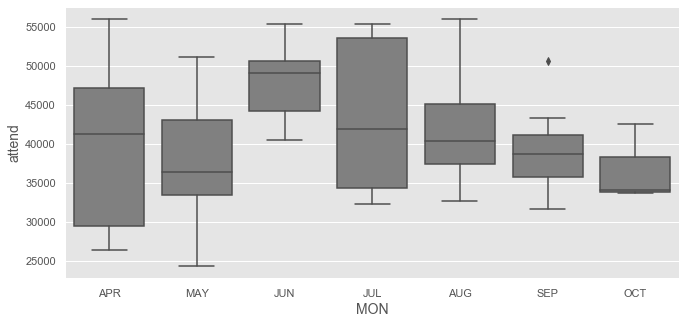

In [85]:
sns.boxplot(x="MON", y="attend", data=df, color = "gray")

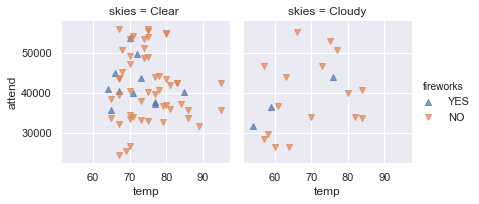

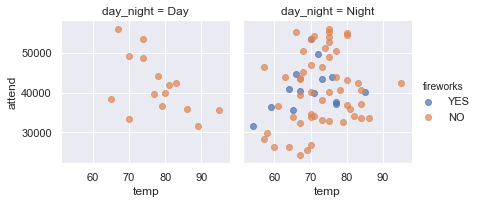

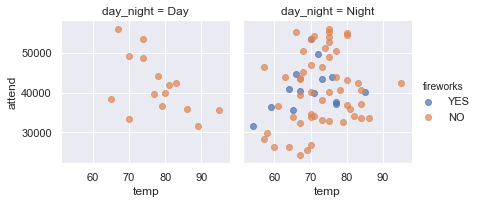

In [86]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()
g = sns.FacetGrid(df, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()
g = sns.FacetGrid(df, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

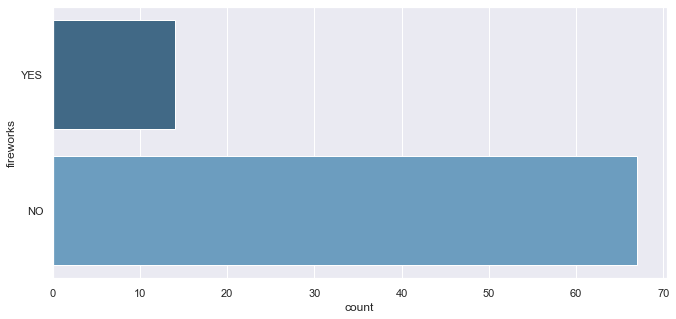

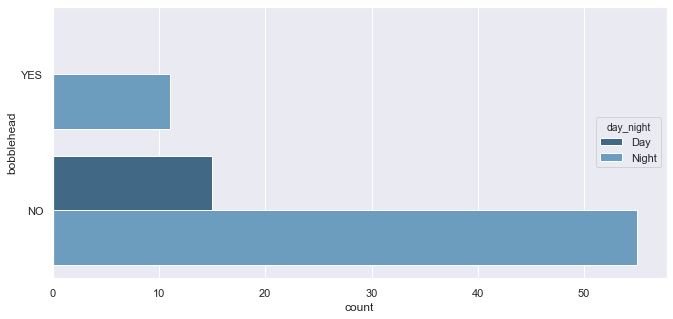

In [87]:
sns.countplot(y="fireworks", data=df, palette="Blues_d",
             order=["YES", "NO"])
g.add_legend();
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=df, palette="Blues_d",
                order=["YES", "NO"])
g.add_legend();
plt.show()

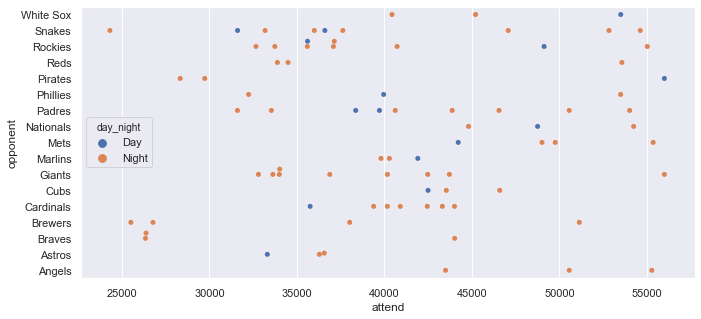

In [88]:
sns.swarmplot(x="attend", y="opponent", hue="day_night", 
              data=df, order=df['opponent'].sort_values(ascending=False).unique())
g.add_legend();
plt.show()

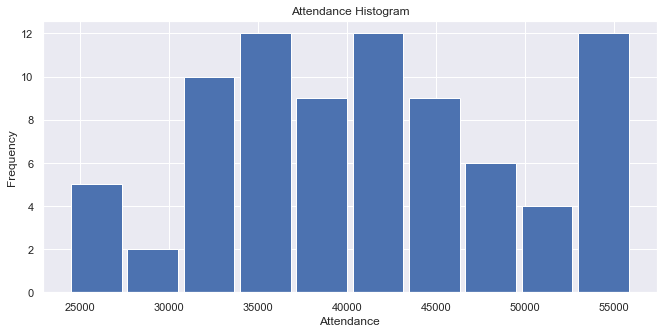

In [89]:
plt.hist(df['attend'], density = False, stacked = False, rwidth = .9)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

In [127]:
from sklearn import preprocessing
import statsmodels.formula.api as smf

df_train = df.sample(int(len(df)*.66666),random_state=41)
df_test = df[~df.index.isin(df_train.index)]

r=smf.ols('attend ~ MON + day_of_week + bobblehead', data=df_train).fit()

attend_predicted=r.predict(df_test)
attend_actual=df_test['attend']
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     5.740
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.00e-05
Time:                        16:26:08   Log-Likelihood:                -524.52
No. Observations:                  53   AIC:                             1077.
Df Residuals:                      39   BIC:                             1105.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.151e+04   2742.805     15.136      0.000     3.6e+04    4.71e+04
MON[T.AUG]                 308.8475   3057.846      0.101      0.920   -5876.230    6493.925
MON[T.JUL]                1923.8324   2604.195      0.739      0.464   -3343.648    7191.313
MON[T.JUN]                6736.0595   3085.857      2.183      0.035     494.324     1.3e+04
MON[T.MAY]               -4254.0540   2561.158     -1.661      0.105   -9434.485     926.377
MON[T.OCT]               -4224.0907   6278.174     -0.673      0.505   -1.69e+04    8474.715
MON[T.SEP]               -3163.7576   2725.004     -1.161      0.253   -8675.598    2348.082
day_of_week[T.Monday]    -8712.7797   2977.269     -2.926      0.006   -1.47e+04   -2690.685
day_of_week[T.Saturday]   -115.1979   2829.582     -0.041      0.968   -5838.567    5608.171
day_of_week[T.Sunday]     -711.1884   2733.471     -0.260      0.796   -6240.155    4817.778
day_of_week[T.Thursday]   -1.15e+04   3955.537     -2.906      0.006   -1.95e+04   -3494.981
day_of_week[T.Tuesday]    3524.9283   3116.484      1.131      0.265   -2778.755    9828.611
day_of_week[T.Wednesday] -3275.8683   3060.026     -1.071      0.291   -9465.354    2913.618
bobblehead[T.YES]         1.157e+04   2718.421      4.256      0.000    6072.018    1.71e+04
==============================================================================
Omnibus:                        5.029   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.708
Skew:                           0.227   Prob(JB):                       0.0576
Kurtosis:                       4.542   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
round(attend_actual.corr(attend_predicted)**2,2)

0.35

           month       day    attend      temp       dow    bh_bit
month   1.000000 -0.317497  0.049306  0.806647 -0.027308 -0.030223
day    -0.317497  1.000000  0.027093 -0.127612  0.187159  0.145363
attend  0.049306  0.027093  1.000000  0.098951  0.125134  0.581895
temp    0.806647 -0.127612  0.098951  1.000000  0.115349  0.049573
dow    -0.027308  0.187159  0.125134  0.115349  1.000000 -0.095582
bh_bit -0.030223  0.145363  0.581895  0.049573 -0.095582  1.000000


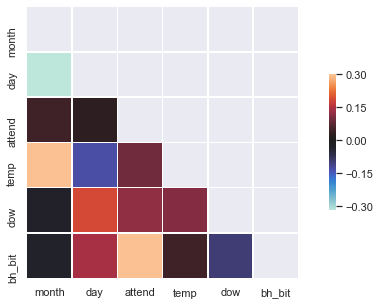

In [145]:
corr=df.drop('year',axis=1).corr()
print(corr)
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [146]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,year,MON,gamedate,dow,bh_bit
0,4,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,2012,APR,2012-04-10,1,0
1,4,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cross,2012,APR,2012-04-11,2,0
2,4,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cross,2012,APR,2012-04-12,3,0
3,4,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cross,2012,APR,2012-04-13,4,0
4,4,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Divisional,2012,APR,2012-04-14,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,Divisional,2012,SEP,2012-09-29,5,0
77,9,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,Cross,2012,SEP,2012-09-30,6,0
78,10,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,Cross,2012,OCT,2012-10-01,0,0
79,10,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO,Divisional,2012,OCT,2012-10-02,1,0


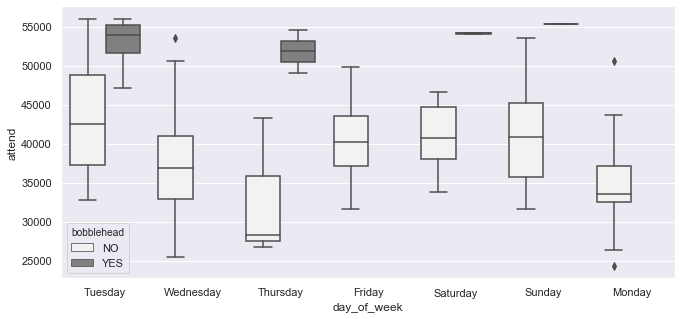

In [151]:
### Adding bobblehead as hue to show if it makes a difference on a given day of the week
sns.boxplot(x="day_of_week", y="attend", hue='bobblehead',data=df, color = "gray")

In [152]:
from sklearn import preprocessing
import statsmodels.formula.api as smf

df_train = df.sample(int(len(df)*.66666),random_state=41)
df_test = df[~df.index.isin(df_train.index)]

r=smf.ols('attend ~ MON + day_of_week + bobblehead + shirt', data=df_train).fit()

attend_predicted=r.predict(df_test)
attend_actual=df_test['attend']
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6.182
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.66e-06
Time:                        16:36:59   Log-Likelihood:                -521.39
No. Observations:                  53   AIC:                             1073.
Df Residuals:                      38   BIC:                             1102.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.148e+04   2619.753     15.835      0.000    3.62e+04    4.68e+04
MON[T.AUG]                1120.3519   2944.251      0.381      0.706   -4839.973    7080.677
MON[T.JUL]                2875.0037   2525.314      1.138      0.262   -2237.227    7987.235
MON[T.JUN]                5776.0888   2980.095      1.938      0.060    -256.798    1.18e+04
MON[T.MAY]               -3635.2645   2462.637     -1.476      0.148   -8620.613    1350.084
MON[T.OCT]               -3769.2092   6000.055     -0.628      0.534   -1.59e+04    8377.267
MON[T.SEP]               -3174.8628   2602.717     -1.220      0.230   -8443.788    2094.062
day_of_week[T.Monday]    -1.014e+04   2917.683     -3.474      0.001    -1.6e+04   -4229.712
day_of_week[T.Saturday]   -492.8864   2708.146     -0.182      0.857   -5975.242    4989.469
day_of_week[T.Sunday]    -1855.6677   2663.075     -0.697      0.490   -7246.781    3535.445
day_of_week[T.Thursday]  -1.152e+04   3778.045     -3.050      0.004   -1.92e+04   -3876.298
day_of_week[T.Tuesday]    1835.7330   3075.853      0.597      0.554   -4391.005    8062.471
day_of_week[T.Wednesday] -3699.9249   2929.167     -1.263      0.214   -9629.714    2229.864
bobblehead[T.YES]         1.209e+04   2607.357      4.637      0.000    6812.104    1.74e+04
shirt[T.YES]              7678.8528   3522.919      2.180      0.036     547.075    1.48e+04
==============================================================================
Omnibus:                        6.297   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                8.712
Skew:                           0.242   Prob(JB):                       0.0128
Kurtosis:                       4.926   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""